<a href="https://colab.research.google.com/github/Shivani11032006/DA-Projects/blob/main/Zomato_Restaurants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PROBLEM STATEMENT: The food service industry is highly competitive, and platforms like Zomato rely on data to understand customer preferences, restaurant performance, and market trends.
This project aims to analyze restaurant data across metropolitan cities to identify factors influencing restaurant ratings, pricing strategies, cuisine popularity, and customer engagement.

In [3]:
zomato=pd.read_csv("/content/zomato_dataset.csv")

In [4]:
zomato.head()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0


In [5]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  123657 non-null  object 
 1   Dining Rating    91421 non-null   float64
 2   Delivery Rating  122377 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item Name        123657 non-null  object 
 9   Best Seller      27942 non-null   object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


In [6]:
zomato.columns

Index(['Restaurant Name', 'Dining Rating', 'Delivery Rating', 'Dining Votes',
       'Delivery Votes', 'Cuisine ', 'Place Name', 'City', 'Item Name',
       'Best Seller', 'Votes', 'Prices'],
      dtype='object')

In [7]:
zomato.shape

(123657, 12)

In [8]:
zomato.describe()

,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Votes,Prices
count,91421.000000,122377.000000,123657.000000,123657.000000,123657.000000,123657.000000
mean,3.822264,3.963184,152.729858,115.763725,24.666772,241.378399
std,0.408693,0.245900,232.214061,243.970828,125.236009,192.830713
min,2.500000,2.500000,0.000000,0.000000,0.000000,0.950000
25%,3.600000,3.800000,0.000000,0.000000,0.000000,130.000000
50%,3.900000,4.000000,30.000000,0.000000,0.000000,208.570000
75%,4.100000,4.100000,217.000000,23.000000,15.000000,299.000000
max,4.800000,4.600000,997.000000,983.000000,9750.000000,12024.000000


In [9]:
zomato.isnull().sum()

,0
Restaurant Name,0
Dining Rating,32236
Delivery Rating,1280
Dining Votes,0
Delivery Votes,0
Cuisine,0
Place Name,0
City,0
Item Name,0
Best Seller,95715


In [10]:
avg_rating = zomato["Dining Rating"].mean()
avg_cost = zomato["Prices"].mean()
total_restaurants = zomato.shape[0]

print("Average Rating:", round(avg_rating,2))
print("Average Cost for Two:", round(avg_cost,2))
print("Total Restaurants:", total_restaurants)

Average Rating: 3.82
Average Cost for Two: 241.38
Total Restaurants: 123657



Understanding restaurant performance helps food-tech platforms and restaurant owners
optimize pricing, improve customer satisfaction, and identify expansion opportunities.



In [11]:
city_rating = zomato.groupby("City")["Dining Rating"].mean().sort_values(ascending=False)

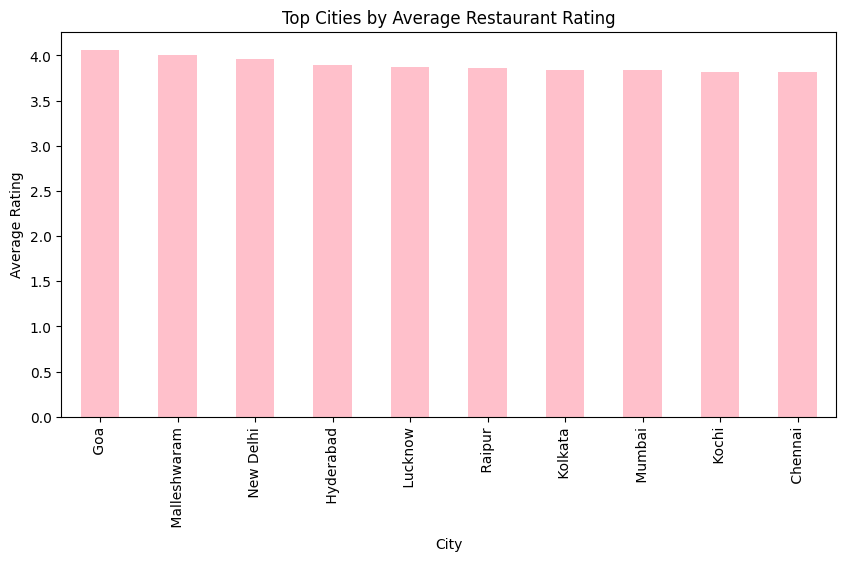

In [12]:
#highest rated restaurant
plt.figure(figsize=(10,5))
city_rating.head(10).plot(kind="bar",color='pink')
plt.title("Top Cities by Average Restaurant Rating")
plt.ylabel("Average Rating")
plt.show()

Metropolitan cities such as Goa and Delhi show higher average restaurant ratings, indicating mature food markets with better service quality and customer satisfaction. Cities with lower average ratings may benefit from quality improvement initiatives and customer experience optimization.

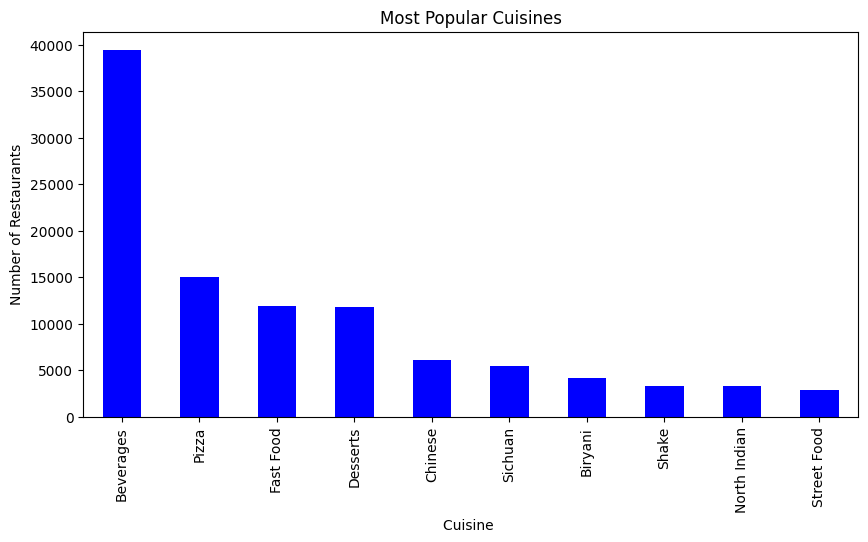

In [13]:
#popular cuisines
cuisines = zomato["Cuisine "].str.split(", ").explode()
top_cuisines = cuisines.value_counts().head(10)
plt.figure(figsize=(10,5))
top_cuisines.plot(kind="bar",color='blue')
plt.title("Most Popular Cuisines")
plt.ylabel("Number of Restaurants")
plt.show()

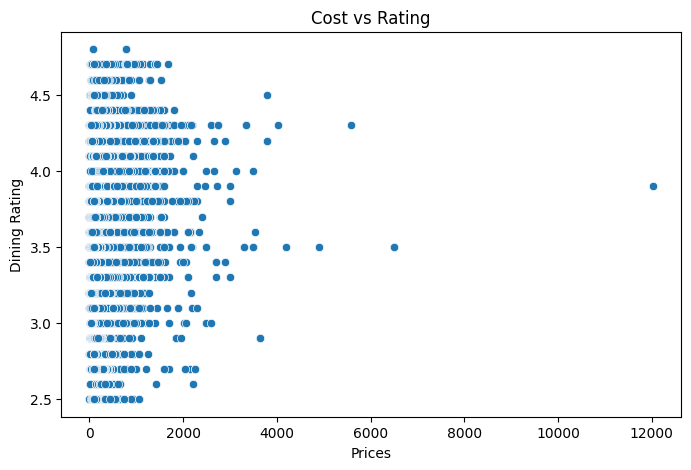

In [14]:
#cost by ratings
plt.figure(figsize=(8,5))
sns.scatterplot(data=zomato, x="Prices", y="Dining Rating")
plt.title("Cost vs Rating")
plt.show()

The scatter plot shows no strong positive correlation between cost and rating.
This indicates that higher prices do not guarantee better customer satisfaction, and affordable restaurants can still achieve high ratings through quality and service.

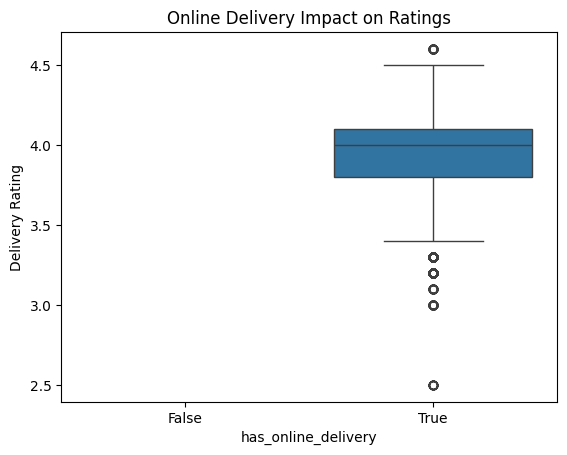

In [15]:
#impact on ratings via online
zomato['has_online_delivery'] = zomato['Delivery Rating'].notna()
sns.boxplot(data=zomato, x="has_online_delivery", y="Delivery Rating")
plt.title("Online Delivery Impact on Ratings")
plt.show()

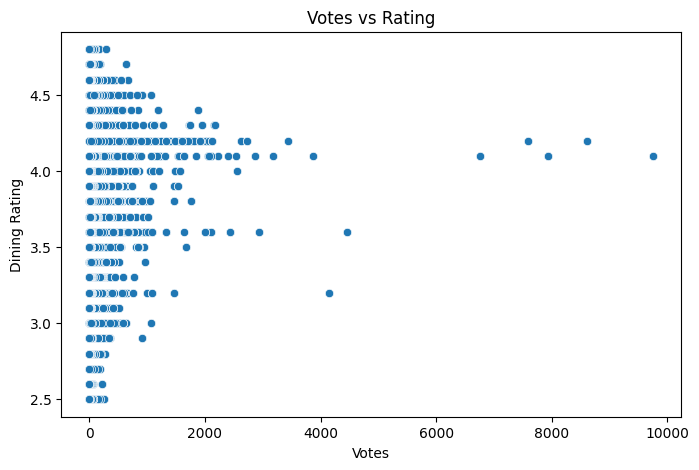

In [16]:
#votes by dining rating
plt.figure(figsize=(8,5))
sns.scatterplot(data=zomato, x="Votes", y="Dining Rating")
plt.title("Votes vs Rating")
plt.show()

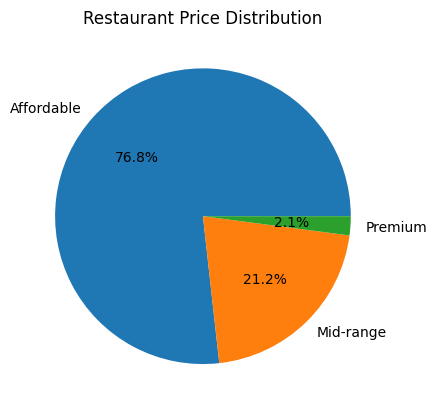

In [17]:
#pie chart for price distribution
zomato["price_category"] = pd.cut(
    zomato["Prices"],
    bins=[0, 300, 700, 3000], # Added the missing 'bins' argument
    labels=["Affordable","Mid-range","Premium"]
)

zomato["price_category"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Restaurant Price Distribution")
plt.ylabel("")
plt.show()

Most restaurants fall under the affordable and mid-range categories, indicating price-sensitive customers dominate the market.
Premium restaurants form a smaller but important segment.

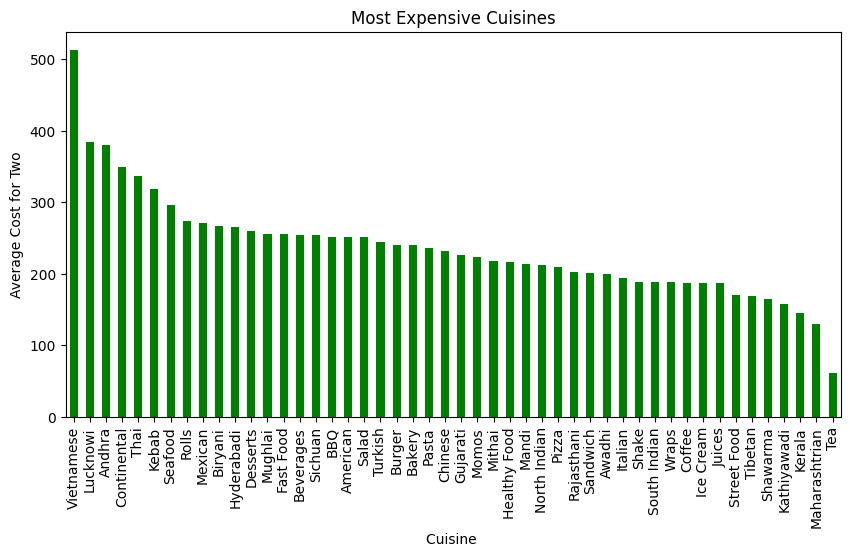

In [18]:
#cuisine vs cost
cuisine_cost = zomato.groupby("Cuisine ")["Prices"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
cuisine_cost.plot(kind="bar",color='green')
plt.title("Most Expensive Cuisines")
plt.ylabel("Average Cost for Two")
plt.show()

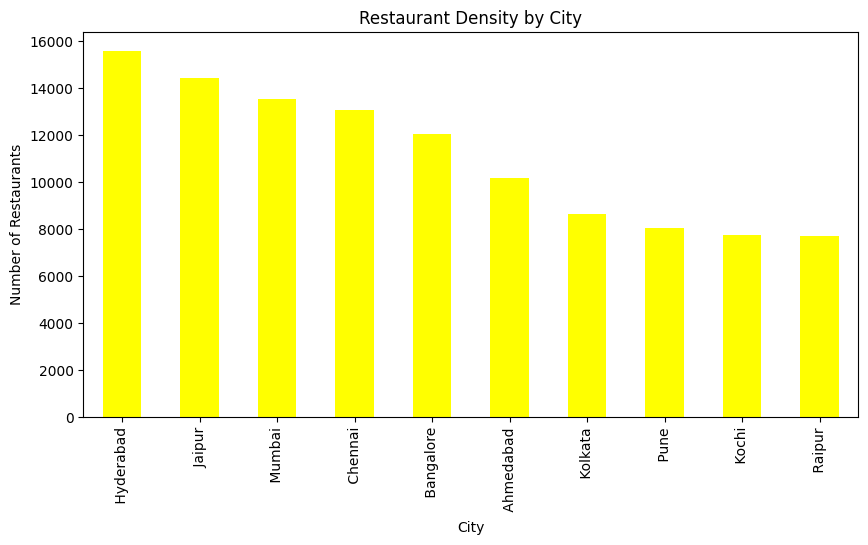

In [19]:
#city by density
city_count = zomato["City"].value_counts()
plt.figure(figsize=(10,5))
city_count.head(10).plot(kind="bar",color='yellow')
plt.title("Restaurant Density by City")
plt.ylabel("Number of Restaurants")
plt.show()

Cities like Hyderabad and Jaipur show higher average ratings, indicating mature food markets with better customer satisfaction.
Cities with lower average ratings may need quality improvements or better service standards.

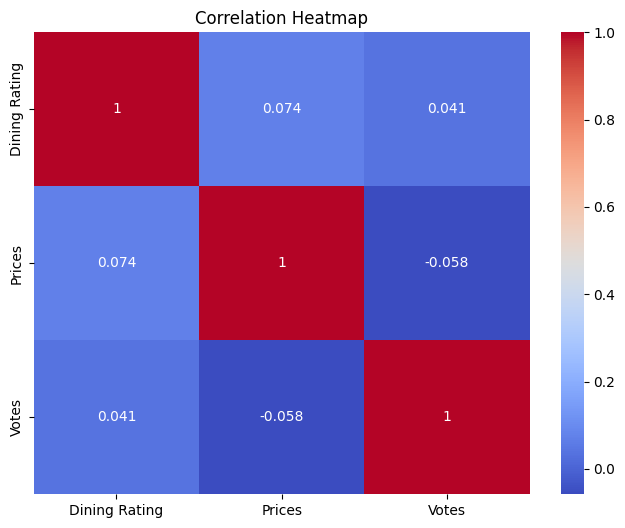

In [20]:
#heatmap = correlation
plt.figure(figsize=(8,6))
sns.heatmap(zomato[["Dining Rating","Prices","Votes"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Restaurants with high prices but low ratings represent potential problem areas where pricing, service quality, or customer experience may need improvement.

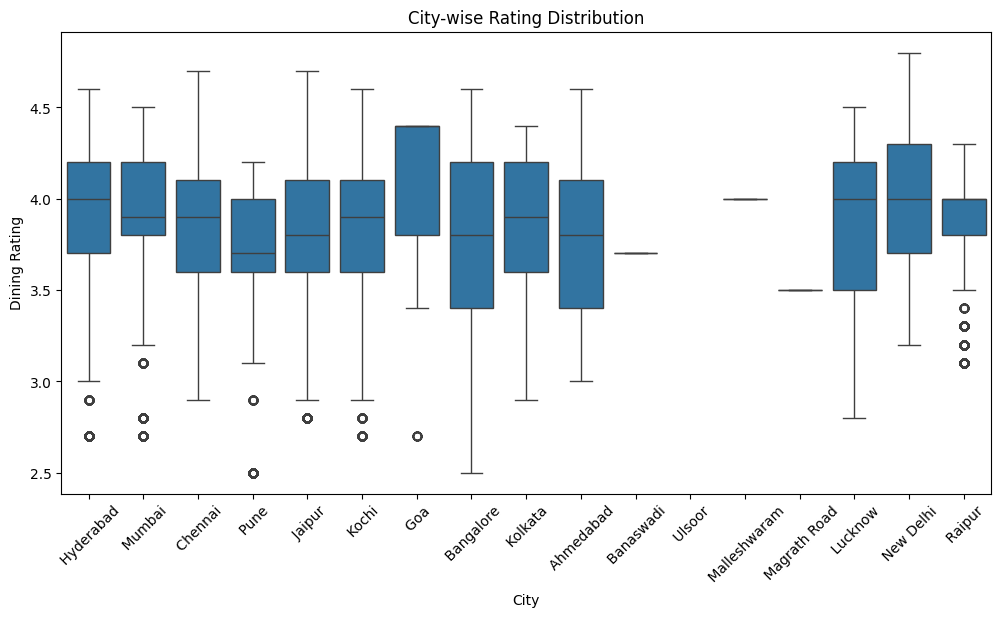

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(data=zomato, x="City", y="Dining Rating")
plt.xticks(rotation=45)
plt.title("City-wise Rating Distribution")
plt.show()

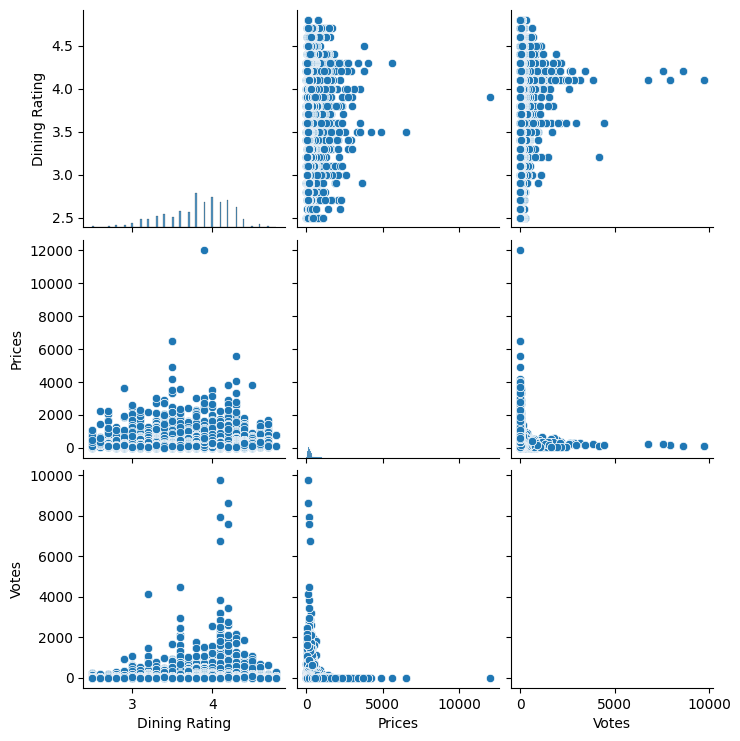

In [22]:
#Pairplot / Scatter Matrix
sns.pairplot(zomato[["Dining Rating","Prices","Votes"]])
plt.show()

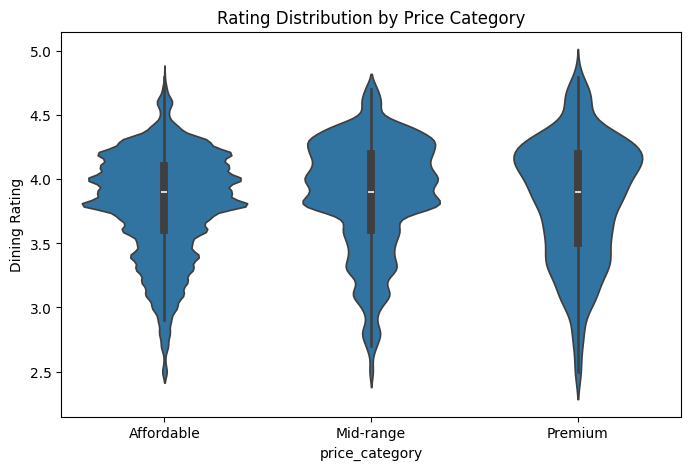

In [23]:
plt.figure(figsize=(8,5))
sns.violinplot(data=zomato, x="price_category", y="Dining Rating")
plt.title("Rating Distribution by Price Category")
plt.show()

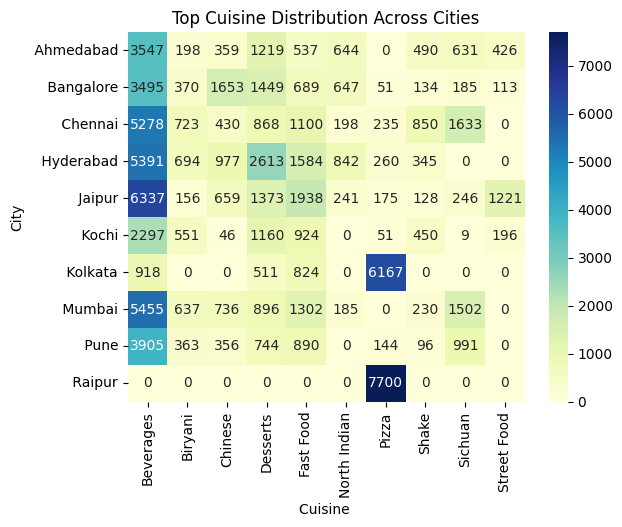

In [24]:
#heatmap
top_cities = zomato["City"].value_counts().head(10).index
top_cuisines = zomato["Cuisine "].str.split(", ").explode().value_counts().head(10).index

pivot = zomato[zomato["City"].isin(top_cities)]
pivot = pivot[pivot["Cuisine "].str.contains("|".join(top_cuisines))]

heatmap_data = pd.crosstab(pivot["City"], pivot["Cuisine "])
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Top Cuisine Distribution Across Cities")
plt.show()

CONCLUSION: This project successfully analyzed restaurant data using data analytics techniques to uncover insights related to customer preferences, pricing strategies, restaurant performance, and market competition.